In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
# from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('/Users/djdit/OneDrive - University of South Florida/Project/Data/data.csv')

In [3]:
print(df.shape)
df.head()

(209, 80)


wk_strt_dt  yr_nbr  qtr_nbr  prd  wk_nbr  wk_in_yr_nbr   mdip_dm  \
0  2014-08-03    2014        3    7       1            27   4863885   
1  2014-08-10    2014        3    7       2            28  20887502   
2  2014-08-17    2014        3    7       3            29  11097724   
3  2014-08-24    2014        3    7       4            30   1023446   
4  2014-08-31    2014        3    8       1            31  21109811   

   mdip_inst  mdip_nsp  mdip_auddig  ...  seas_prd_12  seas_week_40  \
0   29087520   2421933       692315  ...            0             0   
1    8345120   3984494       475810  ...            0             0   
2   17276800   1846832       784732  ...            0             0   
3   18468480   2394834      1032301  ...            0             0   
4   26659920   3312008       400456  ...            0             0   

   seas_week_41  seas_week_42  seas_week_43  seas_week_44  seas_week_45  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   seas_week_46  seas_week_47  seas_week_48  
0             0             0             0  
1             0             0             0  
2             0             0             0  
3             0             0             0  
4             0             0             0  

[5 rows x 80 columns]

In [4]:
pd.set_option('display.max_rows', 80)
df.dtypes

wk_strt_dt                   object
yr_nbr                        int64
qtr_nbr                       int64
prd                           int64
wk_nbr                        int64
wk_in_yr_nbr                  int64
mdip_dm                       int64
mdip_inst                     int64
mdip_nsp                      int64
mdip_auddig                   int64
mdip_audtr                    int64
mdip_vidtr                    int64
mdip_viddig                   int64
mdip_so                       int64
mdip_on                       int64
mdip_em                       int64
mdip_sms                      int64
mdip_aff                      int64
mdip_sem                      int64
mdsp_dm                     float64
mdsp_inst                   float64
mdsp_nsp                    float64
mdsp_auddig                 float64
mdsp_audtr                  float64
mdsp_vidtr                  float64
mdsp_viddig                 float64
mdsp_so                     float64
mdsp_on                     

In [5]:
df.describe()

yr_nbr     qtr_nbr         prd      wk_nbr  wk_in_yr_nbr  \
count   209.000000  209.000000  209.000000  209.000000    209.000000   
mean   2016.004785    2.507177    6.526316    2.703349     26.626794   
std       1.226697    1.122838    3.465562    1.274015     15.119856   
min    2014.000000    1.000000    1.000000    1.000000      1.000000   
25%    2015.000000    2.000000    4.000000    2.000000     14.000000   
50%    2016.000000    3.000000    7.000000    3.000000     27.000000   
75%    2017.000000    4.000000   10.000000    4.000000     40.000000   
max    2018.000000    4.000000   12.000000    5.000000     53.000000   

            mdip_dm     mdip_inst      mdip_nsp   mdip_auddig    mdip_audtr  \
count  2.090000e+02  2.090000e+02  2.090000e+02  2.090000e+02  2.090000e+02   
mean   9.544510e+06  1.247717e+07  1.616957e+06  1.002816e+06  2.295103e+07   
std    8.293082e+06  1.024959e+07  2.203341e+06  8.122848e+05  1.567124e+07   
min    0.000000e+00  4.853300e+04  0.000000e+00  1.561800e+04  0.000000e+00   
25%    2.087021e+06  5.304240e+06  2.542340e+05  4.577220e+05  1.236705e+07   
50%    7.664954e+06  8.911466e+06  8.870720e+05  8.061170e+05  1.910160e+07   
75%    1.533852e+07  1.786920e+07  2.248483e+06  1.344765e+06  2.956004e+07   
max    3.979871e+07  6.545146e+07  1.553181e+07  5.418819e+06  9.066538e+07   

       ...  seas_prd_12  seas_week_40  seas_week_41  seas_week_42  \
count  ...   209.000000    209.000000    209.000000    209.000000   
mean   ...     0.081340      0.019139      0.019139      0.019139   
std    ...     0.274012      0.137342      0.137342      0.137342   
min    ...     0.000000      0.000000      0.000000      0.000000   
25%    ...     0.000000      0.000000      0.000000      0.000000   
50%    ...     0.000000      0.000000      0.000000      0.000000   
75%    ...     0.000000      0.000000      0.000000      0.000000   
max    ...     1.000000      1.000000      1.000000      1.000000   

       seas_week_43  seas_week_44  seas_week_45  seas_week_46  seas_week_47  \
count    209.000000    209.000000    209.000000    209.000000    209.000000   
mean       0.019139      0.019139      0.019139      0.019139      0.019139   
std        0.137342      0.137342      0.137342      0.137342      0.137342   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       seas_week_48  
count    209.000000  
mean       0.019139  
std        0.137342  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 79 columns]

In [6]:
#Check for nulls and only print columns that contain nulls
missing_data = df.isnull().sum()
if missing_data[1] > 0: print(missing_data)

In [7]:
df.nunique()

wk_strt_dt                  209
yr_nbr                        5
qtr_nbr                       4
prd                          12
wk_nbr                        5
wk_in_yr_nbr                 53
mdip_dm                     208
mdip_inst                   209
mdip_nsp                    203
mdip_auddig                 207
mdip_audtr                  207
mdip_vidtr                  207
mdip_viddig                 204
mdip_so                     158
mdip_on                     209
mdip_em                     209
mdip_sms                    201
mdip_aff                    209
mdip_sem                    209
mdsp_dm                     209
mdsp_inst                   209
mdsp_nsp                    201
mdsp_auddig                 205
mdsp_audtr                  208
mdsp_vidtr                  207
mdsp_viddig                 206
mdsp_so                     198
mdsp_on                     209
mdsp_sem                    209
sales                       209
me_ics_all                   43
me_gas_d

C:\Users\djdit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

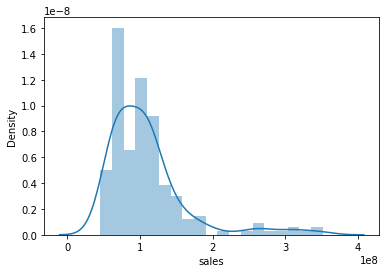

In [8]:
sns.distplot(df['sales'])

<AxesSubplot:>

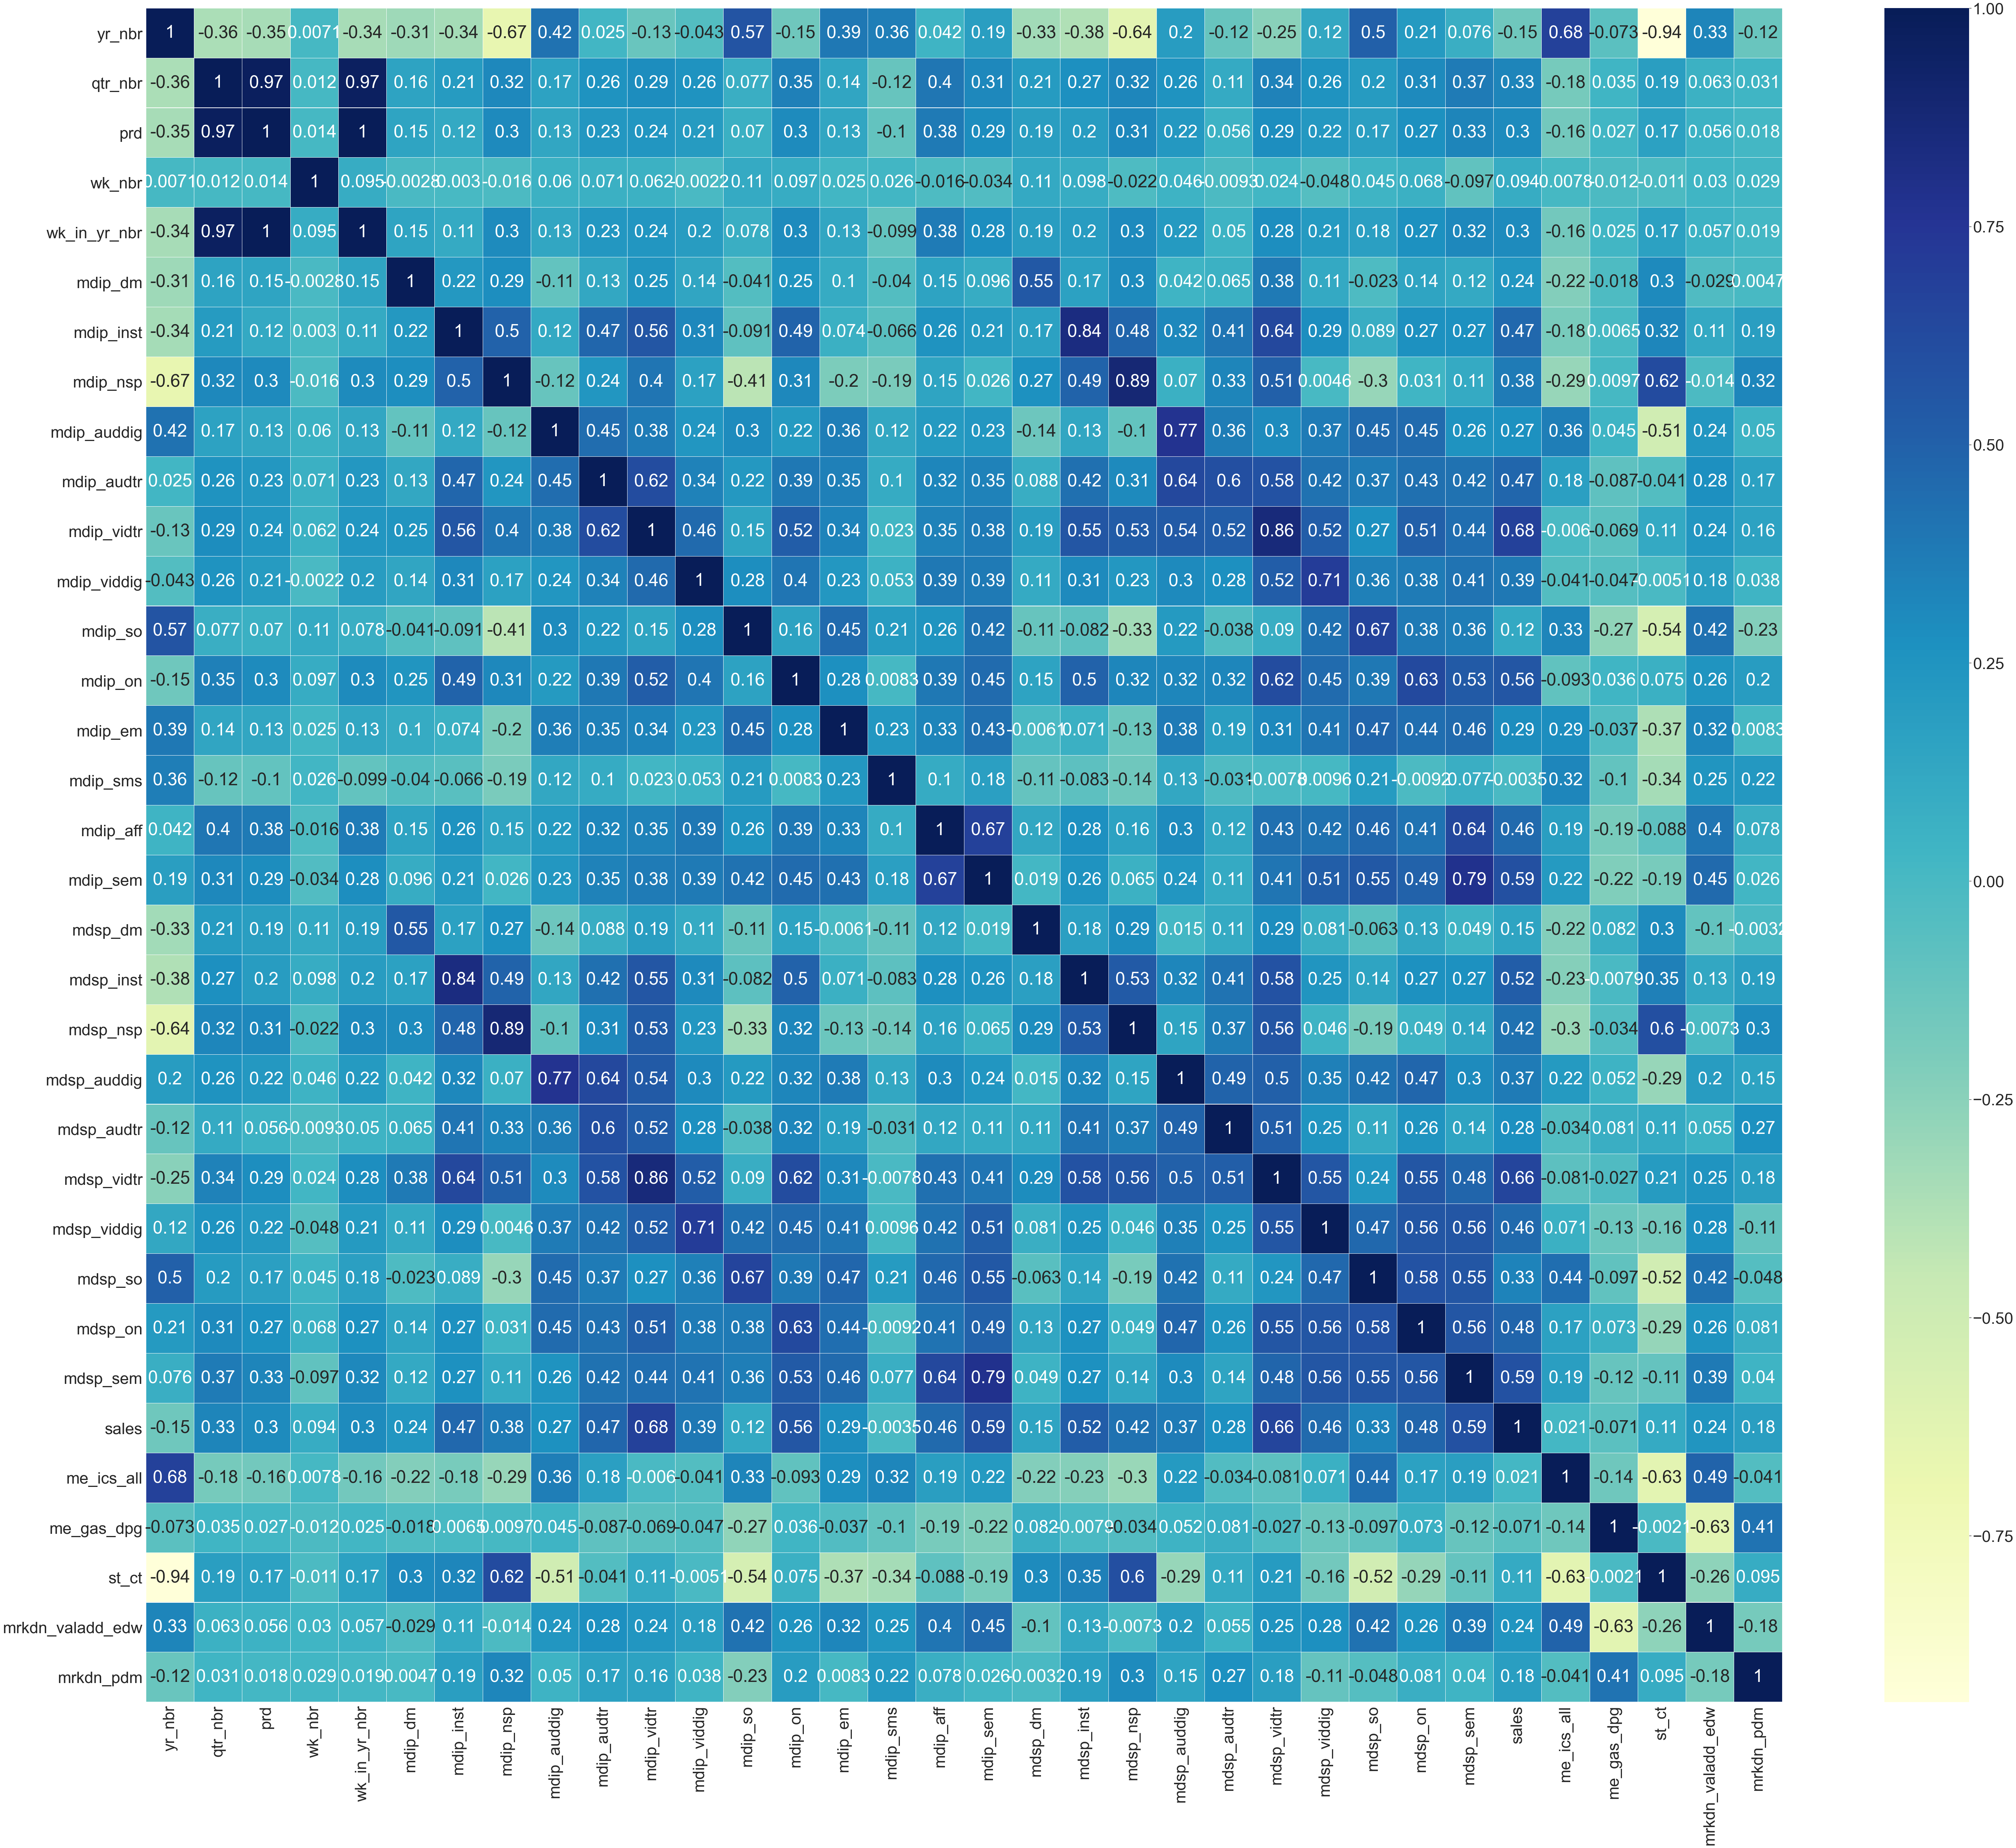

In [9]:
df1 = df.iloc[ : , :35]
sales_corr = df1.corr()
sns.set(font_scale=4)
plt.subplots(figsize=(100,85))

sns.heatmap(sales_corr, cmap='YlGnBu', linewidth=.005, annot=True)

In [77]:
# Create new data frame with relevant dates, sales, spend data
sale_spend = df.loc[:,df.columns.intersection(['wk_strt_dt', 'sales', 'mdsp_dm','mdsp_inst', 'mdsp_nsp','mdsp_auddig', 'mdsp_audtr',
                'mdsp_vidtr', 'mdsp_viddig', 'mdsp_so', 'mdsp_on', 'mdsp_sem'])]

In [78]:
sale_spend.rename(columns={'wk_strt_dt': 'Week_Start', 'sales': 'Sales', 'mdsp_dm' : 'Direct_Mail','mdsp_inst' : 'Insert', 
                           'mdsp_nsp' : 'Newspaper','mdsp_auddig' : 'Digital_Audio', 'mdsp_audtr' : 'Radio', 'mdsp_vidtr' : 'TV',
                           'mdsp_viddig' : 'Digital_Video', 'mdsp_so' : 'Social', 'mdsp_on' : 'Online_Display', 'mdsp_sem' : 'SEM'}, 
                  inplace=True)

In [79]:
print(sale_spend.shape)
sale_spend.head()

(209, 12)


Week_Start  Direct_Mail     Insert  Newspaper  Digital_Audio      Radio  \
0  2014-08-03    678410.26  129759.66  507635.16        2700.69  254134.14   
1  2014-08-10    661097.71   70355.33  625719.37        5039.35  106602.98   
2  2014-08-17   1874338.43  107720.37  277532.61        2610.93   59011.42   
3  2014-08-24    306583.37  141708.61  186028.61        6032.91  178010.46   
4  2014-08-31   2366274.16  160691.30  706694.09        5187.32  144097.56   

          TV  Digital_Video  Social  Online_Display        SEM        Sales  
0  216725.59       45397.90     0.0        61364.75  355954.51  72051457.64  
1  108919.26        2903.36     0.0       132643.90  336306.72  78794770.54  
2   74032.19        8110.48     0.0        76741.27  344787.96  70071185.56  
3  110995.66        6516.22     0.0       193043.55  365495.11  68642464.59  
4  225140.84       19381.12     0.0       249612.89  401789.35  86190784.65

In [80]:
# create lag variables for 1y for revenue and channels to look for seasonality

sale_spend = pd.concat([sale_spend, sale_spend.shift(52).add_suffix('_lag1y')], axis=1)

sale_spend['Sales_lag1w'] = sale_spend['Sales'].shift()
sale_spend['Sales_lag3m'] = sale_spend['Sales'].shift(13)


In [81]:
# Create rolling average variable for 1y, 3m, and 1w for all channel spend 
sale_spend = pd.concat([sale_spend, sale_spend.rolling(1).mean().add_suffix('_p1w'), sale_spend.rolling(13).mean().add_suffix('_p3m'), 
                        sale_spend.rolling(52).mean().add_suffix('_p1y')], axis=1)

In [82]:
print(sale_spend.shape)
sale_spend.head()

(209, 98)


Week_Start  Direct_Mail     Insert  Newspaper  Digital_Audio      Radio  \
0  2014-08-03    678410.26  129759.66  507635.16        2700.69  254134.14   
1  2014-08-10    661097.71   70355.33  625719.37        5039.35  106602.98   
2  2014-08-17   1874338.43  107720.37  277532.61        2610.93   59011.42   
3  2014-08-24    306583.37  141708.61  186028.61        6032.91  178010.46   
4  2014-08-31   2366274.16  160691.30  706694.09        5187.32  144097.56   

          TV  Digital_Video  Social  Online_Display  ...  \
0  216725.59       45397.90     0.0        61364.75  ...   
1  108919.26        2903.36     0.0       132643.90  ...   
2   74032.19        8110.48     0.0        76741.27  ...   
3  110995.66        6516.22     0.0       193043.55  ...   
4  225140.84       19381.12     0.0       249612.89  ...   

   Digital_Audio_lag1y_p1y  Radio_lag1y_p1y TV_lag1y_p1y  \
0                      NaN              NaN          NaN   
1                      NaN              NaN          NaN   
2                      NaN              NaN          NaN   
3                      NaN              NaN          NaN   
4                      NaN              NaN          NaN   

   Digital_Video_lag1y_p1y  Social_lag1y_p1y  Online_Display_lag1y_p1y  \
0                      NaN               NaN                       NaN   
1                      NaN               NaN                       NaN   
2                      NaN               NaN                       NaN   
3                      NaN               NaN                       NaN   
4                      NaN               NaN                       NaN   

   SEM_lag1y_p1y  Sales_lag1y_p1y  Sales_lag1w_p1y  Sales_lag3m_p1y  
0            NaN              NaN              NaN              NaN  
1            NaN              NaN              NaN              NaN  
2            NaN              NaN              NaN              NaN  
3            NaN              NaN              NaN              NaN  
4            NaN              NaN              NaN              NaN  

[5 rows x 98 columns]

In [83]:
pd.set_option('display.max_rows', 100)
sale_spend.dtypes

Week_Start                   object
Direct_Mail                 float64
Insert                      float64
Newspaper                   float64
Digital_Audio               float64
Radio                       float64
TV                          float64
Digital_Video               float64
Social                      float64
Online_Display              float64
SEM                         float64
Sales                       float64
Week_Start_lag1y             object
Direct_Mail_lag1y           float64
Insert_lag1y                float64
Newspaper_lag1y             float64
Digital_Audio_lag1y         float64
Radio_lag1y                 float64
TV_lag1y                    float64
Digital_Video_lag1y         float64
Social_lag1y                float64
Online_Display_lag1y        float64
SEM_lag1y                   float64
Sales_lag1y                 float64
Sales_lag1w                 float64
Sales_lag3m                 float64
Direct_Mail_p1w             float64
Insert_p1w                  

In [84]:
sale_spend = sale_spend.loc[:, ~sale_spend.columns.duplicated()]
sale_spend.drop(['Week_Start_lag1y', 'Sales_p1w', 'Sales_p3m', 'Sales_p1y'], axis=1, inplace=True)
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1y_p1w')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1y_p3m')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1y_p1y')]

In [85]:
print(sale_spend.shape)
sale_spend.head()

(209, 61)


Week_Start  Direct_Mail     Insert  Newspaper  Digital_Audio      Radio  \
0  2014-08-03    678410.26  129759.66  507635.16        2700.69  254134.14   
1  2014-08-10    661097.71   70355.33  625719.37        5039.35  106602.98   
2  2014-08-17   1874338.43  107720.37  277532.61        2610.93   59011.42   
3  2014-08-24    306583.37  141708.61  186028.61        6032.91  178010.46   
4  2014-08-31   2366274.16  160691.30  706694.09        5187.32  144097.56   

          TV  Digital_Video  Social  Online_Display  ...  Newspaper_p1y  \
0  216725.59       45397.90     0.0        61364.75  ...            NaN   
1  108919.26        2903.36     0.0       132643.90  ...            NaN   
2   74032.19        8110.48     0.0        76741.27  ...            NaN   
3  110995.66        6516.22     0.0       193043.55  ...            NaN   
4  225140.84       19381.12     0.0       249612.89  ...            NaN   

   Digital_Audio_p1y  Radio_p1y  TV_p1y  Digital_Video_p1y  Social_p1y  \
0                NaN        NaN     NaN                NaN         NaN   
1                NaN        NaN     NaN                NaN         NaN   
2                NaN        NaN     NaN                NaN         NaN   
3                NaN        NaN     NaN                NaN         NaN   
4                NaN        NaN     NaN                NaN         NaN   

   Online_Display_p1y  SEM_p1y  Sales_lag1w_p1y  Sales_lag3m_p1y  
0                 NaN      NaN              NaN              NaN  
1                 NaN      NaN              NaN              NaN  
2                 NaN      NaN              NaN              NaN  
3                 NaN      NaN              NaN              NaN  
4                 NaN      NaN              NaN              NaN  

[5 rows x 61 columns]

In [86]:
sale_spend.tail()

Week_Start  Direct_Mail    Insert  Newspaper  Digital_Audio      Radio  \
204  2018-07-01      9240.93  40228.70     247.54        3600.19   81629.95   
205  2018-07-08         0.00  31610.68       0.00        6427.50  108353.11   
206  2018-07-15    468700.11  44601.61       0.00        2288.04  138260.98   
207  2018-07-22    696181.94  15339.78     564.40         939.86   67235.71   
208  2018-07-29     27596.68  30488.45     247.54         313.29    7421.35   

            TV  Digital_Video     Social  Online_Display  ...  Newspaper_p1y  \
204  106915.43        5698.40  127450.10       367134.78  ...   34961.755385   
205   38880.62       14408.25   51395.55       229922.46  ...   34592.772500   
206   58461.70        9790.40  123897.22       147652.74  ...   34506.899615   
207   13895.66        1039.56  136457.71       143210.12  ...   34377.389423   
208     959.12         259.89   76394.95       145462.23  ...   32623.574231   

     Digital_Audio_p1y      Radio_p1y         TV_p1y  Digital_Video_p1y  \
204        5456.808269  122817.940577  137490.335769       21724.431923   
205        5499.534231  123204.636731  137259.286346       21672.663077   
206        5470.245577  124739.094231  138177.949231       21729.399808   
207        5328.297115  124333.674038  138271.791923       21718.789423   
208        5279.178269  121968.929231  136499.971923       21379.353077   

        Social_p1y  Online_Display_p1y        SEM_p1y  Sales_lag1w_p1y  \
204  174773.440000       282318.722308  713731.225385     1.064806e+08   
205  174309.491731       282683.914038  718664.425962     1.064535e+08   
206  175227.009231       281589.045962  727310.681731     1.066381e+08   
207  175929.740385       282011.961154  730099.494423     1.067987e+08   
208  175997.192692       281533.887692  722418.760962     1.067902e+08   

     Sales_lag3m_p1y  
204     1.042470e+08  
205     1.048916e+08  
206     1.053026e+08  
207     1.052263e+08  
208     1.063182e+08  

[5 rows x 61 columns]

<AxesSubplot:>

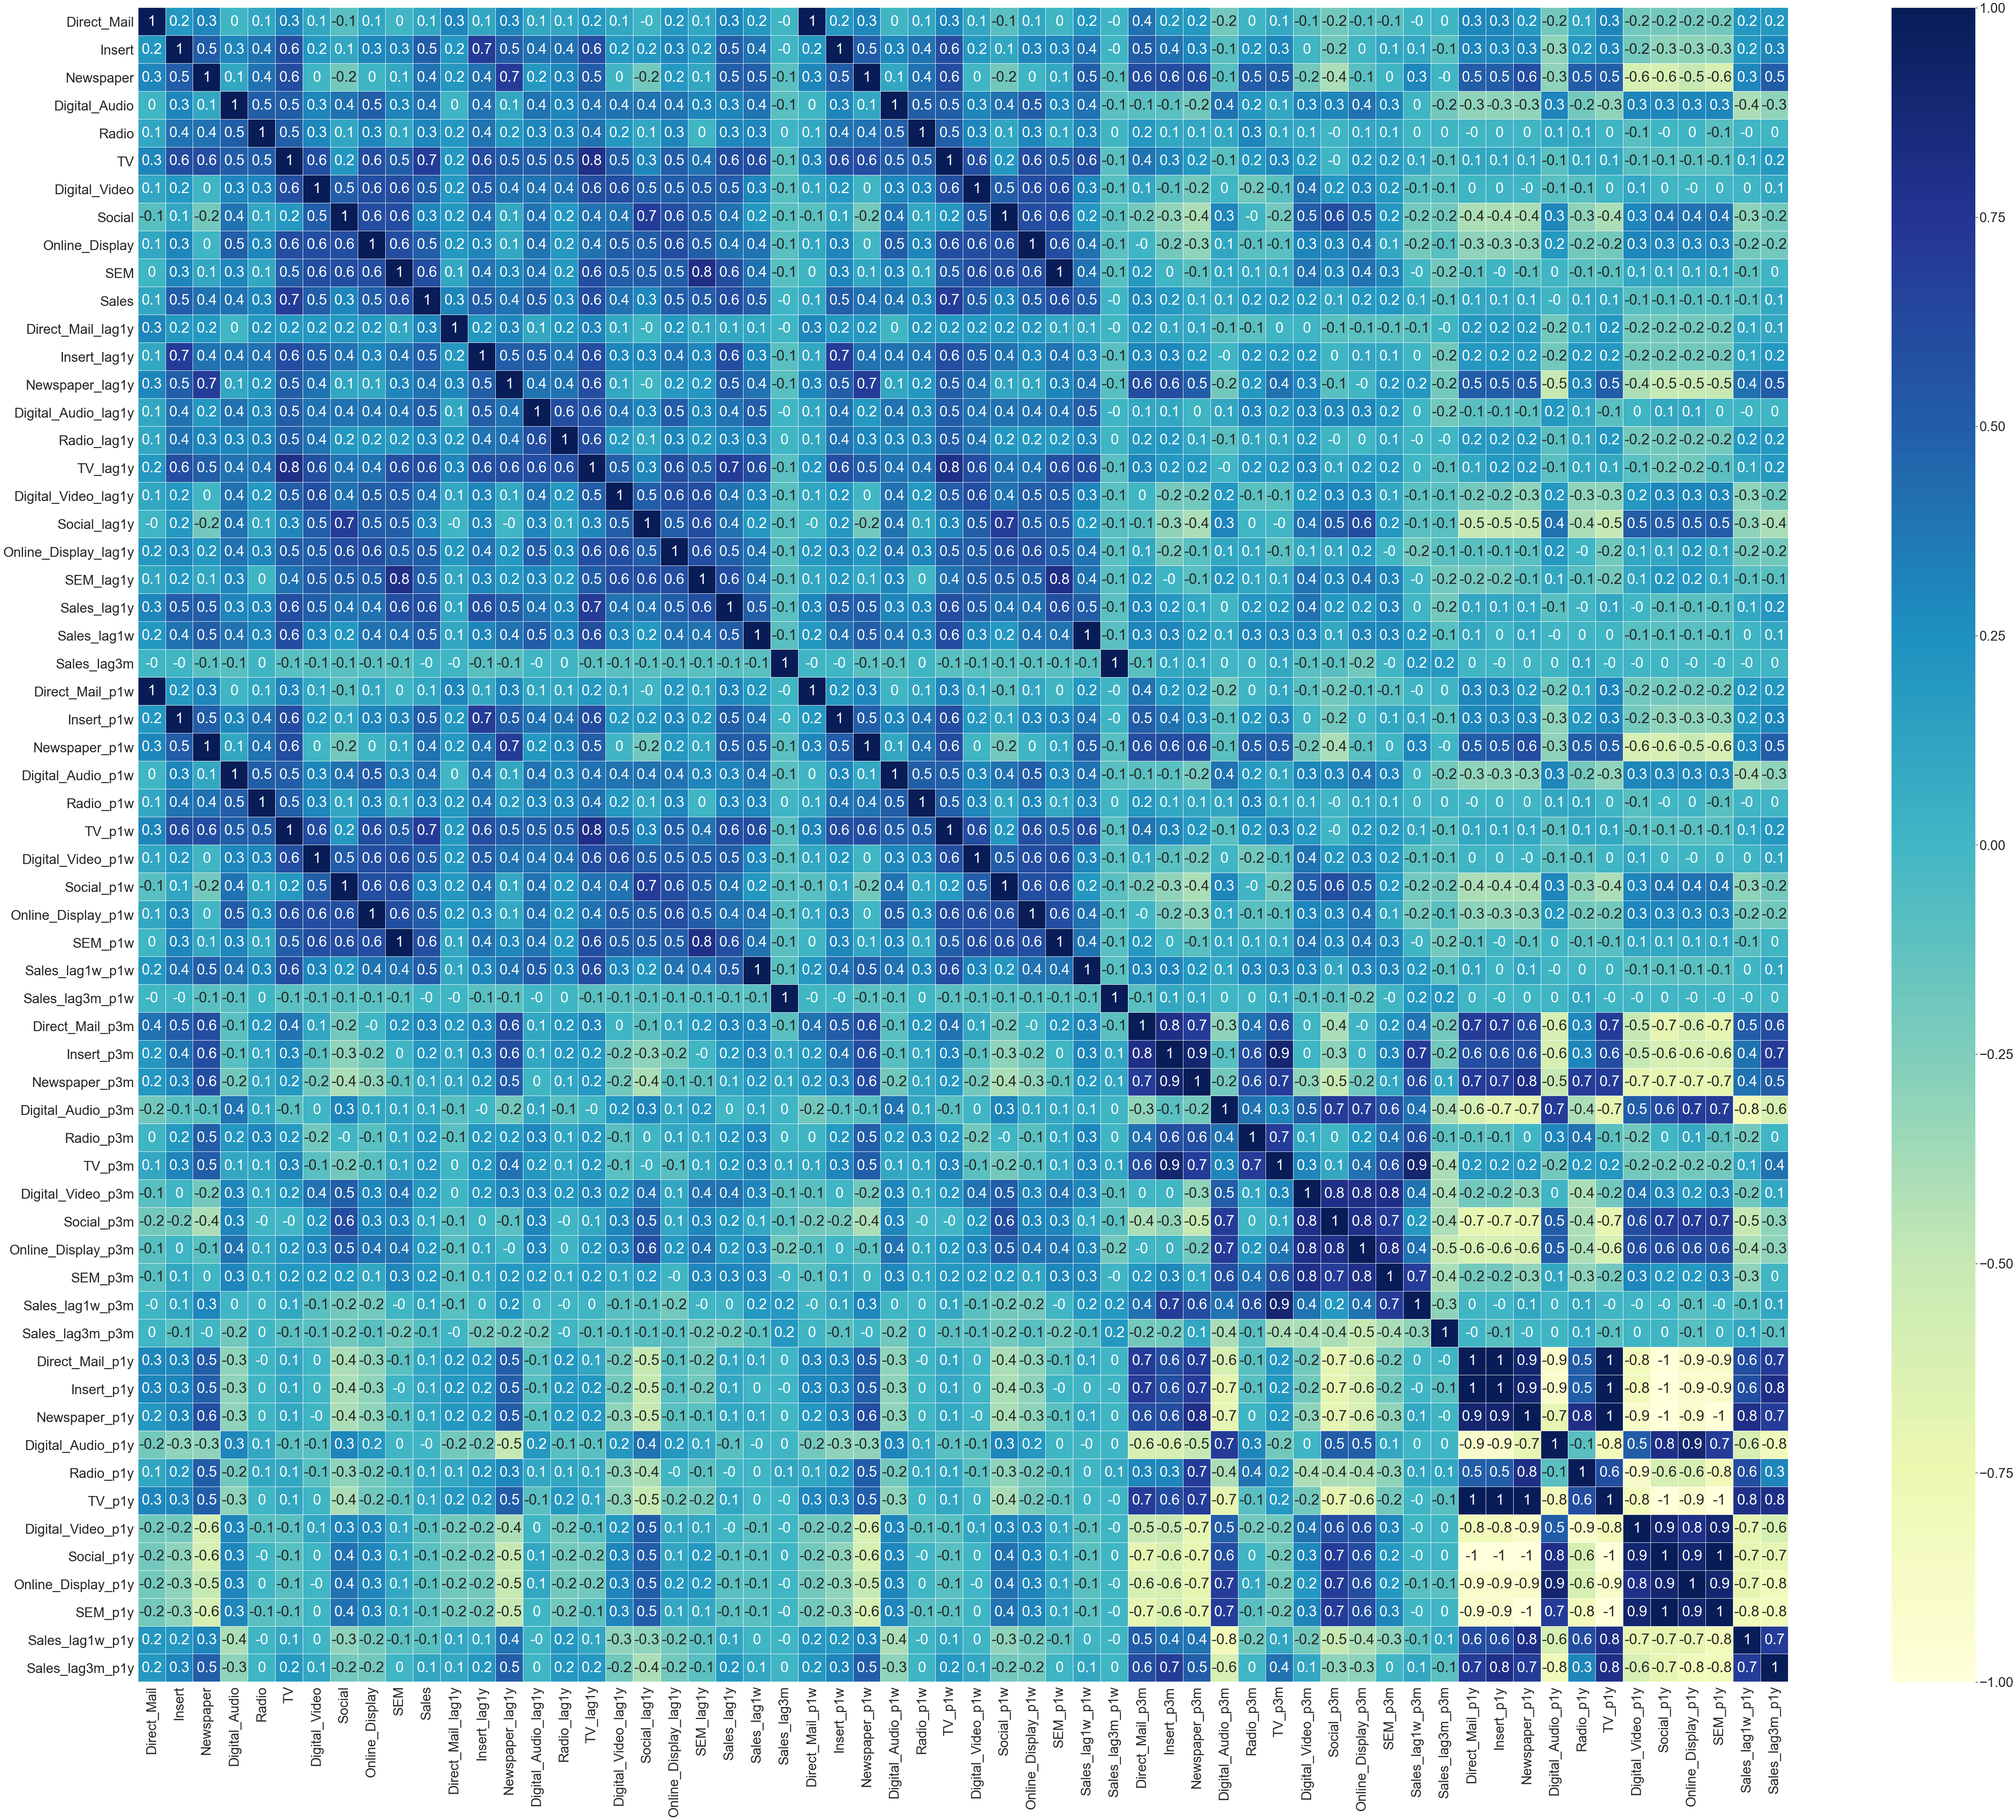

In [66]:
sales_corr = round(sale_spend.corr(), 1)
sns.set(font_scale=3)
plt.subplots(figsize=(90,75))

sns.heatmap(sales_corr, cmap='YlGnBu', linewidth=.005, annot=True)

In [87]:
y = sale_spend['Sales']
X1 = sale_spend.loc[:, sale_spend.columns != 'Sales']
X = X1.loc[:, X1.columns != 'Week_Start']

regr = linear_model.LinearRegression()
regr.fit(X,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').